# IMPORT LIBRARY

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fancyimpute import KNN
from random import randrange, uniform
from scipy.stats import chi2_contingency
%matplotlib inline

Using TensorFlow backend.


In [2]:
#set directory
os.chdir("C:/Users/hp/Desktop/abc satender customer")

In [3]:
#import data as trans short form of transaction
trans = pd.read_csv("train.csv")

# EXPLORATORY DATA ANALYSIS

### CHECKOUT THE DATA

HERE TARGET VALUE 1 MEANS CUSTOMER WILL BUY THE PRODUCT AND 0 MEANS HE WILL NOT BUY THE PRODUCT AND THE TARGET VALUE DEPENDS ON 200 INDEPENDENT VARIABLE

In [4]:
trans.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
trans.shape

(200000, 202)

### THIS SHAPE FUNCTION SHOWS THAT DATA IS VERY LARGE AS IT CONTAIN 2 LAKH OBSERVATION AND 202 VARIABLES.


### SO IF POSSIBLE WE SHOULD REDUCE THE DATASET VARIABLE INTO NECESSARY VARIABLE

### WE USED CORRELATION HEATMAP AND PRINCIPAL COMPONENT ANALYSIS TO DO SO

In [6]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
trans.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## FINDING OUT THE MISSING VALUES IN TRAIN DATASET

In [8]:
trans.isnull().sum().head(5)

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
dtype: int64

In [9]:
#sns.heatmap(trans.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
trans[trans.isna().any(axis=1)]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(trans.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(trans))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv", index = False)

In [11]:
missing_val.head()

,Variables,Missing_percentage
0,ID_code,0.0
1,var_136,0.0
2,var_126,0.0
3,var_127,0.0
4,var_128,0.0


### UNIVARIATE ANALYSIS

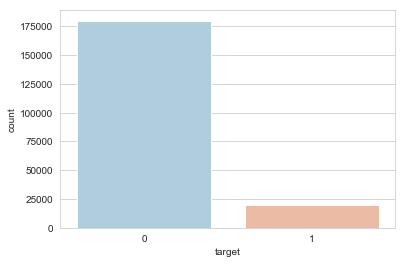

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=trans,palette='RdBu_r')

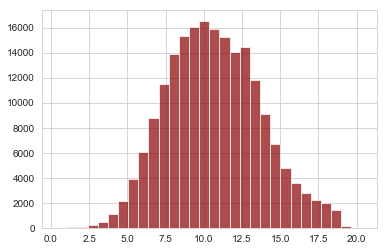

In [13]:
trans['var_0'].hist(bins=30,color='darkred',alpha=0.7)

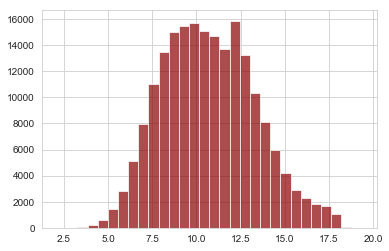

In [14]:
trans['var_2'].hist(bins=30,color='darkred',alpha=0.7)

### BIVARIATE ANALYSIS

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


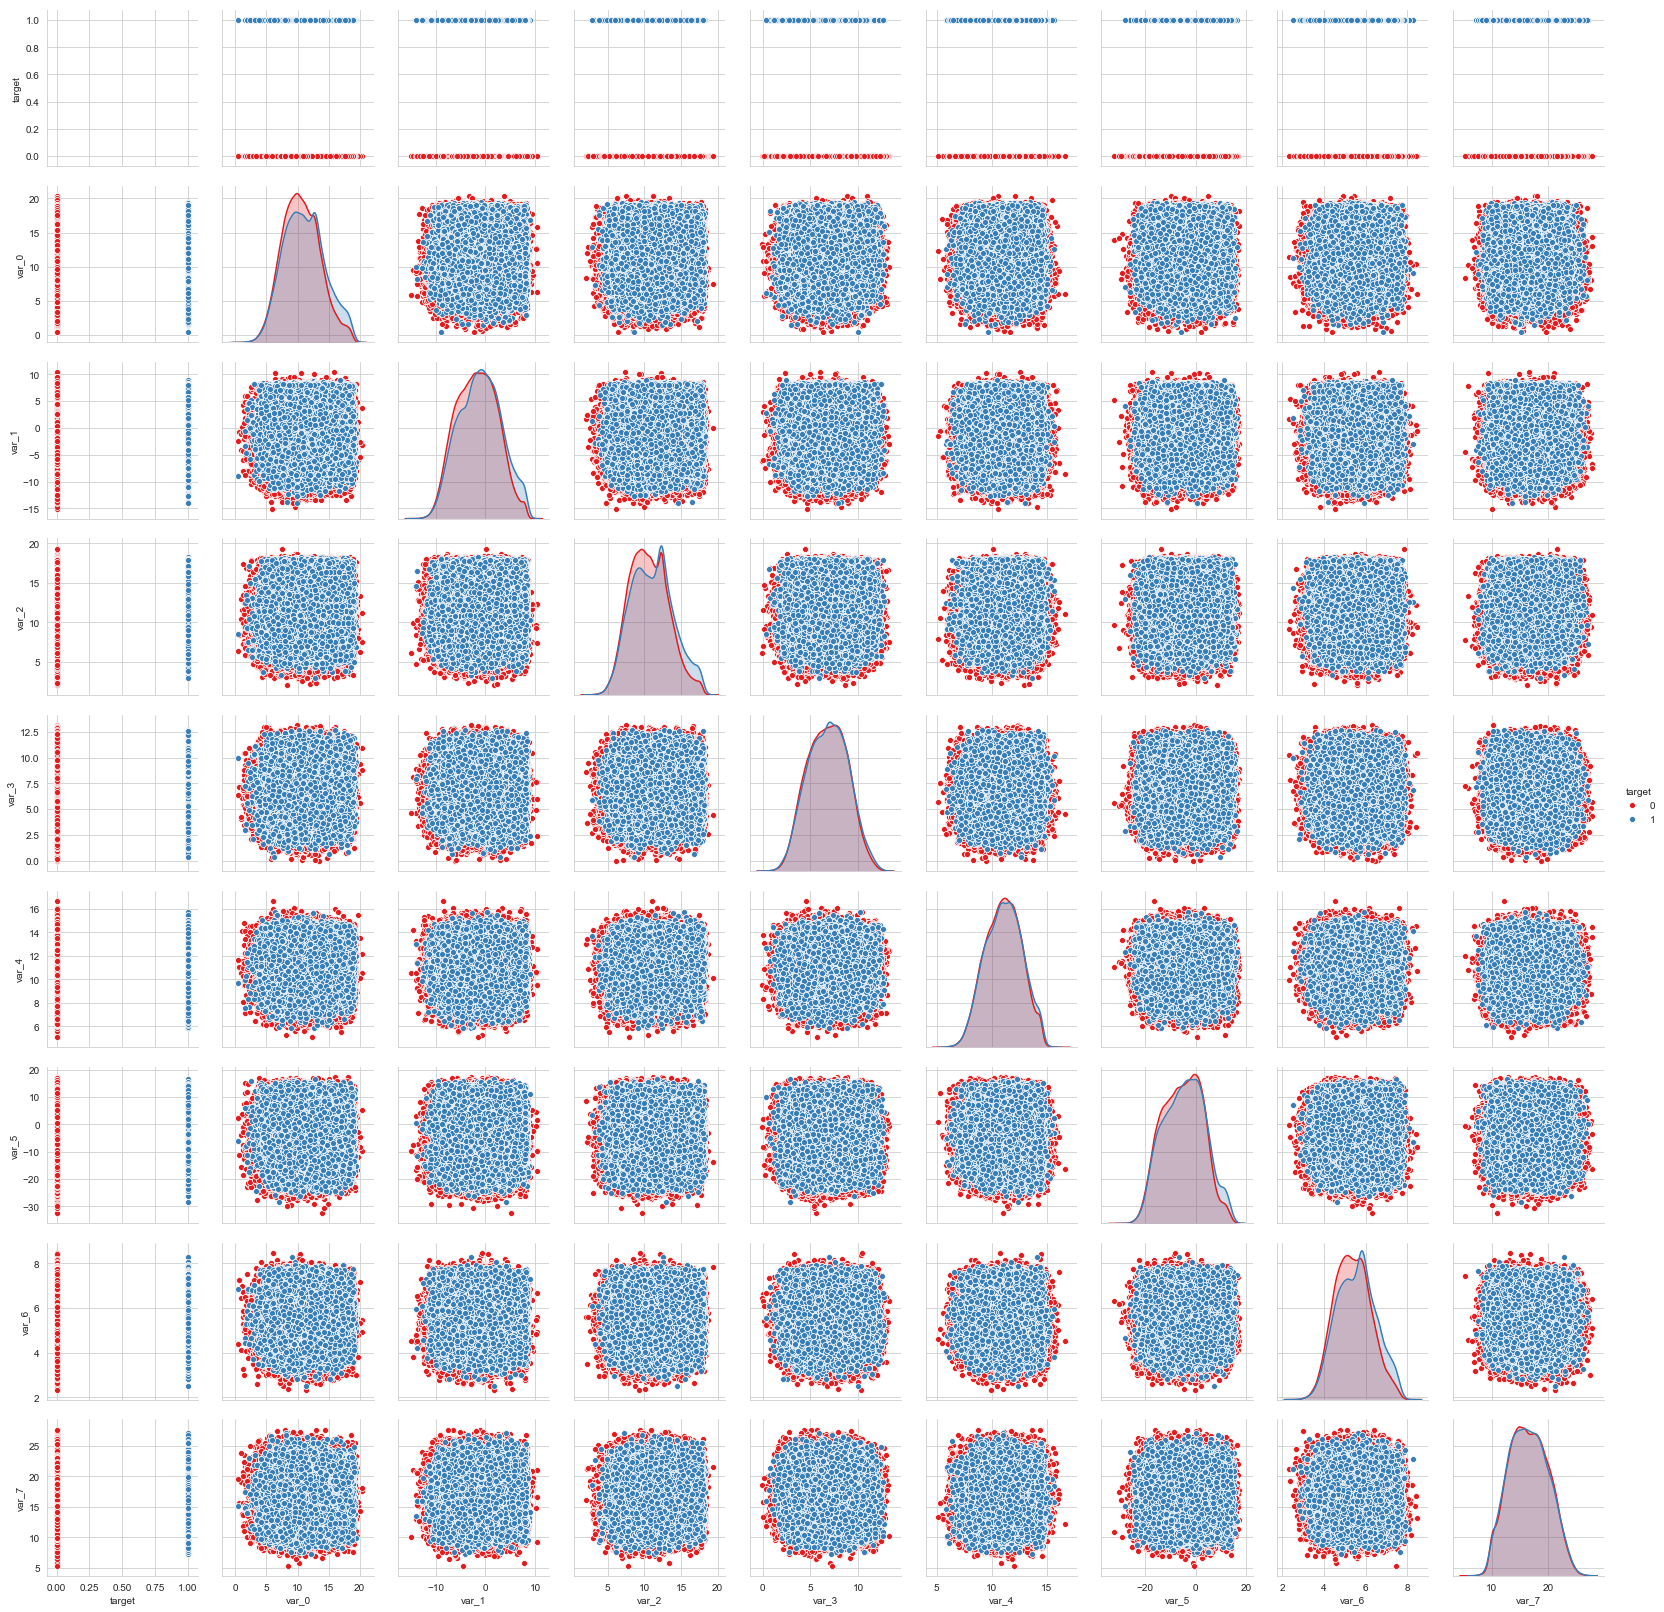

In [15]:
#HERE WE HAVE DRAWN PAIRPLOT OF INITIAL TEN VARIABLES TO GIVE AN ANLYSIS HOW THE VARIABLES ARE
#DEPENDING WITH EACH OTHER
sns.pairplot(trans.iloc[:,0:10],hue='target',palette='Set1')

### MULTIVARIATE ANALYSIS

### FINDING OUT CORRELATION HEAT MAP SO THAT EXTRA VARIABLE CAN BE REMOVED OUT AND GET DATASET CONTAIN LESSER VARIABLE WHICH ARE EASY TO HANDEL

In [16]:
df_corr = trans.iloc[:,2:202]

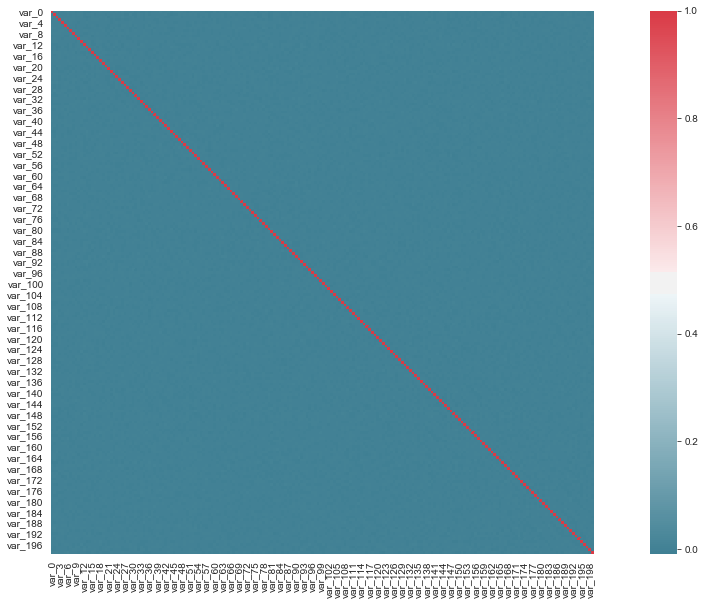

In [17]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### WHOLE HEATMAP IS SHOWING BLUE COLOR EXCEPT FOR DIAGONAL SO HERE HEAT MAP IS SHOWING THAT NO TWO INDEPENDENT VARIABLES ARE DEPENDING WITH EACH OTHER SO WE CAN NOT REMOVE ANY VARIABLE

## USING PCA FOR REMOVING AN EXTRA VARIABLE

In [18]:
#IMPORT LIBRARY TO STANDARDIZE THE DATA
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(trans.iloc[:,2:202])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_data = scaler.transform(trans.iloc[:,2:202])

In [21]:
#IMPORTING THE PCA LIBRARY
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

#### HERE USING DIFFERENT n_component WE CAN SEE THE VARIATION COVERED BY THE N VARIABLE IT SHOULD COMES OUT ATLEAST GREATER THAN 90% PERCENT HERE WE HAVE TAKEN n VALUE EQUAL TO 100 TO JUST CHECK THE TOTAL VARIATION THEY HAVE COVERED

In [22]:
pca.fit(scaled_data)
my_model = pca.transform(scaled_data)

In [23]:
#HERE WE ARE USING FUCTION TO GET VARIATION COVERED BY TOP 100 VARIABLES
print(pca.explained_variance_)
#HERE WE ARE USING FUCTION TO GET VARIATION COVERED BY TOP 100 VARIABLES IN FORM OF RATIO
print(pca.explained_variance_ratio_)
#HERE WE ARE USING FUCTION TO GET VARIATION COVERED BY TOP 100 VARIABLES IN FORM OF SUM OF RATIO
print(pca.explained_variance_ratio_.cumsum())

[1.18961492 1.04817907 1.04684027 1.04554034 1.04272192 1.04107215
 1.04025612 1.03854662 1.03775369 1.03704147 1.03572614 1.03561965
 1.03386141 1.03365166 1.03197531 1.031086   1.03062689 1.0299322
 1.02883532 1.02807177 1.02608733 1.0258167  1.02566814 1.0244671
 1.0243451  1.02330437 1.02297533 1.02165014 1.02104464 1.0205957
 1.01977869 1.0186235  1.01814127 1.01706163 1.01629137 1.01611232
 1.01547534 1.01495657 1.01417721 1.01356702 1.0132985  1.01242743
 1.01120904 1.01072695 1.00996664 1.00939146 1.00807416 1.0078792
 1.00733793 1.00694162 1.00582954 1.00466244 1.0042605  1.0037724
 1.00300689 1.00249715 1.00181516 1.00136767 1.00095415 1.00030083
 0.99946797 0.99858355 0.99774747 0.99751712 0.99709581 0.99603813
 0.99543758 0.99472416 0.99403962 0.99343253 0.99247138 0.99206012
 0.9919095  0.99109134 0.98945667 0.98845736 0.9878926  0.98741114
 0.98634893 0.98593697 0.98562884 0.98522027 0.98454496 0.98405093
 0.98367571 0.98285982 0.98208546 0.98124678 0.98059492 0.97993632


#### SO WE CAN SEE THAT ONLY 50% OF VARIATIONS IS COVERED BY 100 VARIABLE WHICH IS ALSO A 50 % OF TOTAL VARIABLE.SO IT SHOWS WE SHOULD USE ALL THE VARIABLES TO FORM THE MODEL AS THEY ALL ARE CONTRIBUTING EQUALLY TO FIND TARGET VARIABLE

# DATA PREPROCESSING

#### FOUR METHOD USED IN PREPROCESSING ARE.                                                                                       1) MISSING VALUE ANALYSIS                                                                                                                                    2) OUTLIER ANALYSIS                                                                                                                                             3) DATA SELECTION                                                                                                                                                    4) DATA SCALING

#### DATA DOES NOT HAVE ANY MISSING VALUE SO WE ARE NOT USE MISSING VALUE IMPUTATION

## OUTLIER ANALYSIS

#### BY USING TWO WAYS OUTLIER CAN BE HANDLE.
#### BY REMOVING THE OUTLIER VALUES. 
#### OR BY PUTTING OUTLIER AS NULL VALUE AND THE IMPUTE USING KNN IMPUTATION.
#### SO WE ARE USING FIRST METHOD AS IS GIVES LESSER ERROR

In [24]:
# #Detect and delete outliers from data
for i in range(2,202):
        #print(i)
        q75, q25 = np.percentile(trans.iloc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        #print(min)
        #print(max)
       
        trans = trans.drop(trans[trans.iloc[:,i] < min].index)
        trans = trans.drop(trans[trans.iloc[:,i] > max].index)
        # #Replace with NA
        #trans.iloc[:,i] = np.where(trans.iloc[:,i] >max, np.NaN,trans.iloc[:,i])
        #trans.iloc[:,i] = np.where(trans.iloc[:,i] <min, np.NaN,trans.iloc[:,i])

# #Calculate missing value
        #missing_val = pd.DataFrame(trans.isnull().sum())

#Reset index
        #missing_val = missing_val.reset_index()

#Rename variable
        #missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

    #Calculate percentage
        #missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(fare))*100

#descending order
        #missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

 #Impute with KNN

#fare= pd.DataFrame(KNN(k = 3).complete(fare), columns = fare.columns)

In [ ]:
#missing_val.to_csv("Outliers percentages in each column.csv")

In [25]:
#trans.to_csv("outlier values.csv")

In [26]:
trans = pd.read_csv("outlier values.csv")

#### AFTER REMOVING OUTLIER WE GET 175073 OBSERVATION  FROM 200000 OBSERVATIONS SO 24927 OBSERVATION ARE EXIST AS AN OUTLIER IN TRANS DATASET

In [27]:
trans.shape

(175073, 203)

{'whiskers': [<matplotlib.lines.Line2D at 0x8ac7716780>,
 'caps': [<matplotlib.lines.Line2D at 0x8ac7716f60>,
 'boxes': [<matplotlib.patches.PathPatch at 0x8ac7716518>],
 'medians': [<matplotlib.lines.Line2D at 0x8ac76026a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x8ac7602a20>],
 'means': []}

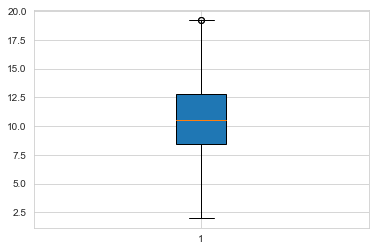

In [28]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(trans['var_0'] ,vert=True,patch_artist=True)

In [31]:
trans = trans.drop(trans.columns[0], axis = 1)

In [32]:
trans.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
2,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
3,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
4,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


## FEATURE SELECTION

#### IN DATA EXPLORATORY ANALYSIS WE HAVE SHOWN EARLIER THAT NO VARIABLE IS DEPENDENT WITH EACH OTHER CORRELATION VALUE IS COMES OUT TO BE 0

#### WE HAVE FETCH OUT INITIAL  10 VARIABLES JUST FOR EXAMPLE TO SHOW BIGGER HEATMAP AND SHOW THAT NO TWO VARIABLE ARE DEPEND ON EACH OTHER

In [33]:
trans_corr = trans.iloc[:,2:10]

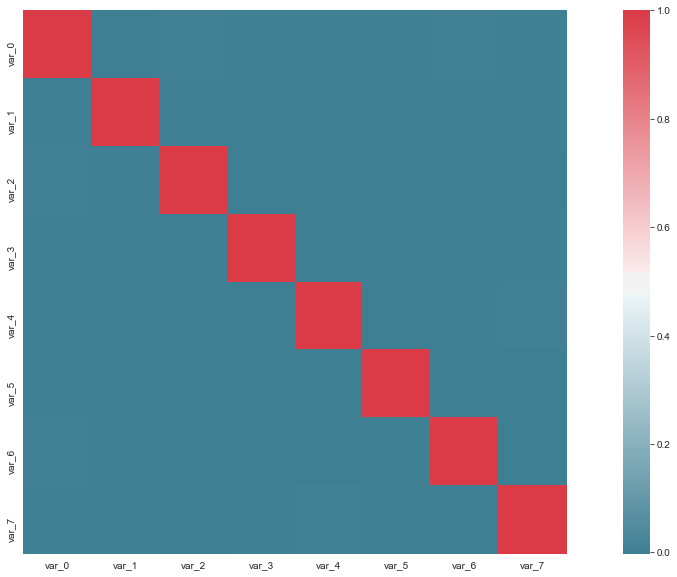

In [34]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = trans_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### DATA SCALING WILL BE DONE ACCORDING TO MACHINE LEARNING ALGORITHM FORM. IF THE ALGORITHM ASSOCIATED WITH DISTANCE THAN WE DO SCALING OF NUMERIC VARIBALE FIRST 

# MODEL FORMATION

## Building a Logistic Regression model

### TRAIN TEST SPLIT

Let's start by splitting our data into a training set and test set

In [35]:
#THIS VARIABLE IS OF STRING DATA TYPE AND IT HAS NO USE IN PREDICTING TARGET VALUE
trans = trans.drop("ID_code" , axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(trans.drop('target',axis=1), 
                                                    trans['target'], test_size=0.30, 
                                                    random_state=101)

### TRAINING AND PREDICTING

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions = logmodel.predict(x_test)

### EVALUATION

HERE WE TAKE THE PRECISION AND RECALL VALUE FOR TARGET VALUE 1 WHICH MEANS HE BUY THE PRODUCT AS IT IS A POSITIVE IN NATURE

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [49]:
# precision and recall for both the values are given
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     47405
           1       0.69      0.26      0.38      5117

    accuracy                           0.92     52522
   macro avg       0.81      0.63      0.67     52522
weighted avg       0.90      0.92      0.90     52522



In [57]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predictions)
CM = pd.crosstab(y_test, predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#Results
#recall = 26.34356068008599
#precision = 69.05737704918033
#AUC =62.53%
#accuracy =92%

recall = 26.34356068008599
precision = 69.05737704918033


In [52]:
#CONFUSION MATRIX
CM

col_0,0,1
target,,
0,46801,604
1,3769,1348


In [27]:
from sklearn import  metrics

In [59]:
metrics.roc_auc_score(y_test, predictions)

0.62534716739157

#### SUMMARY:Results
#### recall = 26.34356068008599
#### precision = 69.05737704918033
##### AUC =62.53%
#### accuracy =92%

## DECISION TREES

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [17]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### PREDICTION AND EVALUATION

In [21]:
predictions_dt = dtree.predict(x_test)

In [22]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     53980
           1       0.19      0.20      0.19      6020

    accuracy                           0.84     60000
   macro avg       0.55      0.55      0.55     60000
weighted avg       0.84      0.84      0.84     60000



In [23]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, predictions_dt)
CM = pd.crosstab(y_test, predictions_dt)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))


recall = 19.53488372093023
precision = 19.174955160606554


In [74]:
#CONFUSION MATRIX
CM

col_0,0,1
target,,
0,43076,4329
1,4149,968


In [70]:
metrics.roc_auc_score(y_test, predictions_dt)

0.5489269313443546

#### SUMMARY:Results
#### recall = 19.53488372093023%
#### precision = 19.174955160606554%
##### AUC =54.89%
#### accuracy =84%

## RANDOM FOREST CLASSIFIER

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
predictions_rfc = rfc.predict(x_test)

In [77]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     47405
           1       1.00      0.00      0.00      5117

    accuracy                           0.90     52522
   macro avg       0.95      0.50      0.47     52522
weighted avg       0.91      0.90      0.86     52522



In [78]:
#build confusion matrix
CM = confusion_matrix(y_test, predictions_rfc)
CM = pd.crosstab(y_test, predictions_rfc)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))


recall = 0.019542700801250732
precision = 100.0


In [79]:
#CONFUSION MATRIX
CM

col_0,0,1
target,,
0,47405,0
1,5116,1


In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

In [80]:
metrics.roc_auc_score(y_test, predictions_rfc)

0.5000977135040062

#### SUMMARY
#### n_estimators=100
#### recall = 0.019542700801250732
#### precision = 100.0
#### AUC =50%
#### accuracy =90%

## NAIVE BAYES

In [38]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)

### PREDICTION AND EVALUATION

In [39]:
#predict test cases
predictions_nb = NB_model.predict(x_test)

In [42]:
print(classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     47405
           1       0.72      0.36      0.48      5117

    accuracy                           0.92     52522
   macro avg       0.83      0.67      0.72     52522
weighted avg       0.91      0.92      0.91     52522



In [43]:
#build confusion matrix
CM = confusion_matrix(y_test, predictions_nb)
CM = pd.crosstab(y_test, predictions_nb)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#recall(y_test, y_pred)*100
print("recall", "=", (TP*100)/(TP+FN))

#precision
print("precision", "=" ,(TP*100)/(TP+FP))

#Results
#Accuracy: 84.49
#FNR: 63

recall = 35.86085597029509
precision = 72.04554377699255


In [25]:
#confusion matrix
CM

col_0,0,1
target,,
0,53071,909
1,3862,2158


In [29]:
metrics.roc_auc_score(y_test, predictions_nb)

0.6708160952930765

#### SUMMARY:Results
#### recall = 35.86085597029509%
#### precision = 72.04554377699255%
#### AUC =67.08%
#### accuracy =92%

## K-NEAREST NEIGHBOUR

In [44]:
#SCALING IS REQUIRED AS KNN USED DISTANCE BETWEEN OBSERVATION TO GET THE TARGET VALUES
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(trans.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_features = scaler.transform(trans.drop('target',axis=1))

In [48]:
df_feat = pd.DataFrame(scaled_features,columns=trans.columns[:-1])
df_feat.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198
0,-0.578729,-1.272071,0.454029,-0.833505,0.235861,-0.535436,-0.334459,0.608948,-1.563655,-1.474087,...,0.263760,-1.148509,0.832979,-0.418099,0.168800,-1.583038,1.023305,-0.374048,-1.030729,0.214393
1,-0.683017,-0.274096,0.519443,0.537071,-0.306122,-0.510052,1.775706,-0.564803,-1.563444,-1.307687,...,-0.073251,0.783443,-0.174259,-0.419415,1.152031,2.303432,-1.616913,-0.695355,-0.384179,0.357108
2,0.125396,-0.127410,-0.667542,0.195822,0.929478,0.411209,0.503244,-0.474235,-1.846064,0.548633,...,0.270633,-0.890166,-0.828758,-0.486301,1.608468,-0.792203,-0.957981,1.502453,0.697066,-0.544141
3,-0.278135,0.037676,0.820752,-0.077432,0.739765,0.955849,0.616272,0.791781,1.793626,0.089837,...,-1.041786,0.694212,-1.425544,1.480018,-1.501592,-0.961638,0.298752,0.645886,0.706289,-0.525993
4,0.262566,-0.168509,0.719595,0.896188,-0.071851,1.097236,-1.012974,-0.386301,0.989258,-1.286229,...,-2.102874,-0.273671,2.313469,-0.734494,-0.972693,0.822862,-1.085705,0.932349,-1.097119,-0.137509


### TRAIN AND SPLIT THE DATA

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,trans['target'],
                                                    test_size=0.30)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### HERE WE CAN NOT PREDICT THE DATA USING KNN AS KNN IS NOT ABLE TO PREDICT THIS DATASET BECAUSE DATASET CONTAIN VERY LARGE NUMBER OF VARIABLES AS IT USES DISTANCE SO IT TAKES INFINITE TIME TO PREDICT THIS DATASET


# SUMMARY

# FINDING THE TARGET VALUE OF TEST DATA

In [80]:
#IMPORT DATA
test =pd.read_csv("test.csv")

In [81]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [82]:
id_code = test.iloc[:,0]

In [83]:
#REMOVE ID_code column as it is string datatype and has no use.
test = test.drop("ID_code" ,axis=1)

## PREDICTIONS

In [84]:
predictions_test = NB_model.predict(test)

In [85]:
df = pd.DataFrame({"ID_code" :id_code ,"target": predictions_test})
df.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [86]:
test = df.join(test)

In [87]:
test.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,0,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,0,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,0,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,0,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [88]:
test.shape

(200000, 202)

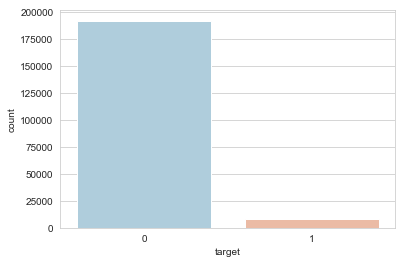

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=test,palette='RdBu_r')

In [90]:
test["target"].value_counts()

0    192096
1      7904
Name: target, dtype: int64

##### CONVERT TARGET VARIABLE "1" AS BUY THE PRODUCT AND "0" AS NOT BUY THE PRODUCT

In [91]:
test["target"] =test["target"].apply( lambda x: "buy" if x==1 else "not buy")

In [92]:
test.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,not buy,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,not buy,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,not buy,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,not buy,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,not buy,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


#### EXPORTING THE FINEL PREDICTIONS AS test_prediction result.csv

In [93]:
test.to_csv("test_prediction result.csv")

### THANK YOU